<a href="https://colab.research.google.com/github/tomdyer10/deep-learning/blob/master/space_type_classifier_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: 

Create a classifier that can determine between different event space types with reasonable accuracy simply from google image selected images

In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *


In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Data/'

Mounted at /content/gdrive


In [19]:
from google.colab import files
uploaded = files.upload()

Saving pdr.csv to pdr.csv


In [0]:
folder = 'Meetings'
file = 'meeting.csv'

In [0]:
folder = 'Staff_party'
file = 'staff_party.csv'

In [0]:
folder = 'PDRs'
file = 'pdr.csv'

In [0]:
path = Path(base_dir)
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [24]:
test = path / 'Staff_party'; test.ls()

[PosixPath('/content/gdrive/My Drive/Data/Staff_party/staff_party.csv')]

# Download Images

In [0]:
classes = ['meetings', 'Staff_party', 'PDRs']

In [43]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [45]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

meetings
Staff_party


PDRs


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [48]:
data.classes

['Meetings', 'PDRs', 'Staff_party']

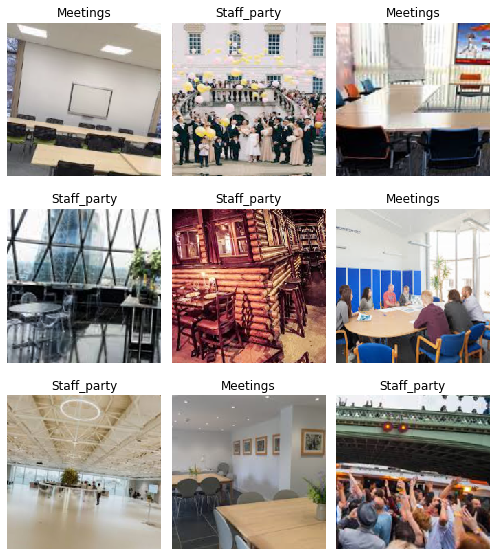

In [53]:
data.show_batch(rows=3, figsize=(7,8))

In [54]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Meetings', 'PDRs', 'Staff_party'], 3, 384, 96)

# Train

In [56]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [58]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.481020,1.063288,0.302083,00:05
1,1.058368,1.566364,0.291667,00:05
2,0.876710,1.267634,0.239583,00:05
3,0.766002,1.105966,0.250000,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


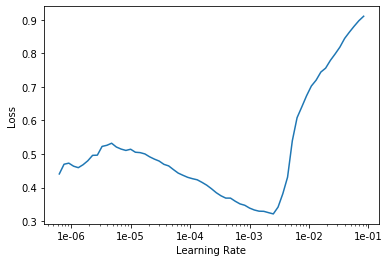

In [63]:
learn.recorder.plot()

In [64]:
learn.fit_one_cycle(2, max_lr=slice(0.5e-5,0.5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.495108,1.026627,0.239583,00:05
1,0.491806,0.978809,0.229167,00:05


In [0]:
learn.save('stage-2')

# Interpretation

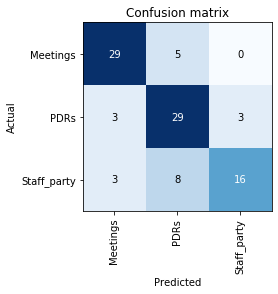

In [66]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

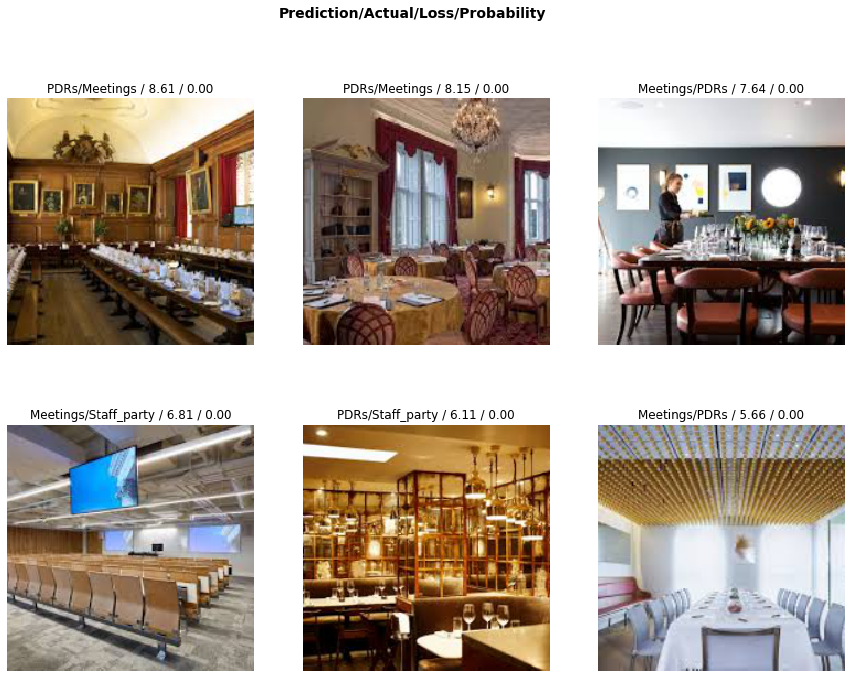

In [68]:
interp.plot_top_losses(6, figsize=(15,11))


# Train ResNet50 

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [70]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.793393,1.429354,0.406250,00:05
1,1.298107,1.209044,0.229167,00:05
2,1.032004,1.142566,0.218750,00:05
3,0.911202,0.857392,0.197917,00:05
4,0.799417,0.854699,0.218750,00:05
5,0.708010,0.877106,0.197917,00:05
6,0.623871,0.876078,0.197917,00:05
7,0.575826,0.865265,0.197917,00:05


In [0]:
learn.save('50-stage-1')

In [0]:
learn.unfreeze()

In [75]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.00E-04


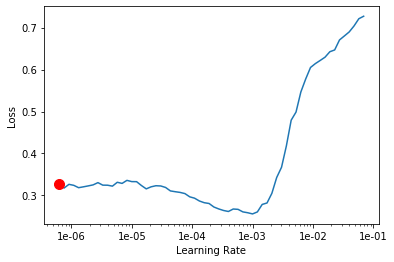

In [77]:
learn.recorder.plot(suggestion=True)

In [78]:
learn.fit_one_cycle(4, max_lr=slice(0.5e-5,0.5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.356862,0.854692,0.197917,00:05
1,0.341412,0.856222,0.197917,00:05
2,0.323665,0.830315,0.197917,00:05
3,0.293010,0.809749,0.187500,00:05


In [79]:
learn.fit_one_cycle(4, max_lr=slice(0.5e-7,0.5e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.210206,0.799948,0.177083,00:05
1,0.231433,0.801584,0.177083,00:05
2,0.229836,0.801823,0.177083,00:05
3,0.229030,0.796367,0.187500,00:05


In [0]:
learn.save('50-stage-2')

# ResNet50 Interp

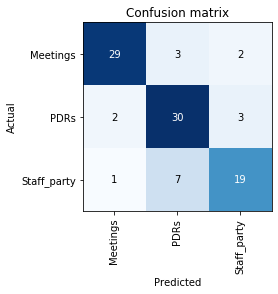

In [82]:


learn.load('50-stage-2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

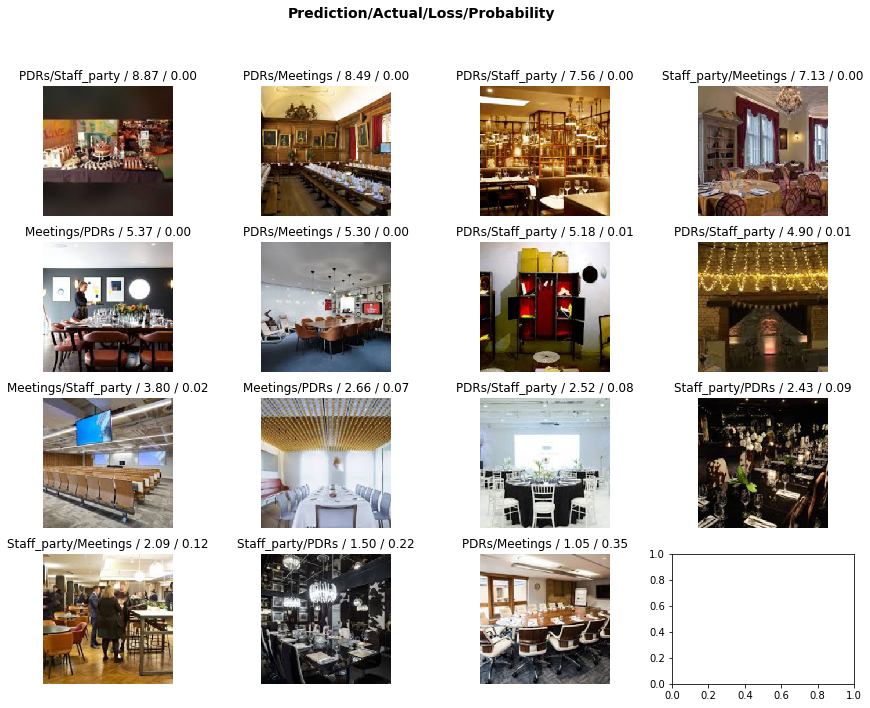

In [84]:
interp.plot_top_losses(15, figsize=(15,11))